In [104]:
import time
import pandas as pd
import pyperclip
import re
import streamlit as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']


In [105]:
def draw_line(lst, lst2=[]):
    df = pd.read_excel(r'C:\Users\NightGlow\Desktop\成都市经济统计.xlsx', index_col=0).iloc[:-1]
    fig, ax = plt.subplots(1, 1)
    for i in lst:
        ax.plot(df['年份'], df[i], '*-', label=i)
    ax.grid()
    # a = df['第一产业（万元）']/(df['第一产业（万元）']+df['第二产业（万元）']+df['第三产业（万元）'])
    # b = df['第二产业（万元）']/(df['第一产业（万元）']+df['第二产业（万元）']+df['第三产业（万元）'])
    # c = df['第三产业（万元）']/(df['第一产业（万元）']+df['第二产业（万元）']+df['第三产业（万元）'])
    if lst2:
        ax2 = ax.twinx()
        for i in lst2:
            ax2.plot(df['年份'], df[i], '*-r', label=i)
    # labels = ['第一产业（万元）','第二产业（万元）','第三产业（万元）']
    # ax.stackplot(df['年份'], a, b, c, labels=labels)
    a = ['0' + str(i) for i in range(3, 10)]
    a.extend([str(i) for i in range(10, 22)])
    ax.set_xticks(df['年份'], a, rotation=60)
    if lst2:
        ax2.set_xticks(df['年份'], a, rotation=60)
    ax.legend()
    if lst2:
        ax2.legend(loc=1)
    plt.show()
    return df

2023-04-14 21:52:58.122 WARNING matplotlib.legend: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


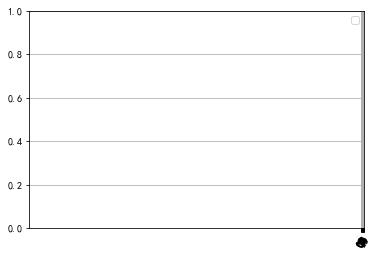

,常住人口,城市化率,地区生产总值（万元）,地区生产总值（千万元）,第一产业（万元）,第二产业（万元）,第三产业（万元）,人均生产总值（元）,社会消费品零售总额（万元）,城镇居民人均可支配收入,农村居民人均可支配收入,人均住宅建筑面积,城镇登记失业率,年份
2003,1173.40,57.52,17652693,17652.693,1613110,6719207,9320376,13638,8682011,8835.0,2592.0,26.10,3.20,2003.0
2004,1194.13,58.11,20607218,20607.218,1877447,8043847,10685924,15731,9880000,10016.0,2936.0,27.20,3.10,2004.0
2005,1221.72,59.85,23701631,23701.631,1918715,10210552,11572364,17782,11347412,11156.0,3331.0,28.20,3.00,2005.0
2006,1248.50,61.53,28048656,28048.656,2287254,12316574,13444828,20615,13134368,12598.0,3798.0,29.30,2.90,2006.0
2007,1257.94,62.58,34753115,34753.115,2746243,15168082,16838790,25215,15567463,14513.0,4382.0,30.50,2.80,2007.0
2008,1270.62,63.58,42069483,42069.483,2756582,18910011,20402890,30290,18960817,16511.0,5016.0,31.60,2.70,2008.0
2009,1286.60,64.85,47384577,47384.577,2766291,21957284,22661002,33758,22619561,18510.0,5712.0,32.90,3.10,2009.0
2010,1405.40,65.75,58894621,58894.621,3138863,27235591,28520167,40288,27003073,21510.0,6591.0,33.90,3.00,2010.0
2011,1457.50,66.86,73453207,73453.207,3357402,34066194,36029611,47750,32754791,24510.0,7661.0,35.10,2.90,2011.0
2012,1510.90,68.18,86196046,86196.046,3418895,39799224,42977927,54211,38133412,27510.0,8910.0,36.20,2.80,2012.0


In [106]:
draw_line([])

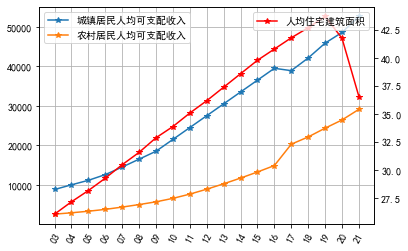

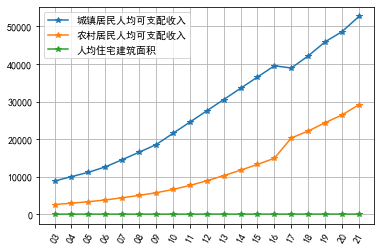

,城镇居民人均可支配收入,农村居民人均可支配收入,人均住宅建筑面积
2003,8835.0,2592.0,26.10
2004,10016.0,2936.0,27.20
2005,11156.0,3331.0,28.20
2006,12598.0,3798.0,29.30
2007,14513.0,4382.0,30.50
2008,16511.0,5016.0,31.60
2009,18510.0,5712.0,32.90
2010,21510.0,6591.0,33.90
2011,24510.0,7661.0,35.10
2012,27510.0,8910.0,36.20


In [108]:
lst = ['城镇居民人均可支配收入', '农村居民人均可支配收入', ]
lst2 = ['人均住宅建筑面积']

draw_line(lst, lst2)
lst.extend(lst2)
draw_line(lst)[lst]
